In [1]:
import pandas as pd
base_risco_credito = pd.read_csv('/content/PlayTennis.csv')

Atributos previsores (historia, divida, garantias, renda) - Atributo Classe (risco)

In [2]:
base_risco_credito

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [3]:
X_risco_credito = base_risco_credito.iloc[:, 0:4].values
X_risco_credito

array([['Sunny', 'Hot', 'High', 'Weak'],
       ['Sunny', 'Hot', 'High', 'Strong'],
       ['Overcast', 'Hot', 'High', 'Weak'],
       ['Rain', 'Mild', 'High', 'Weak'],
       ['Rain', 'Cool', 'Normal', 'Weak'],
       ['Rain', 'Cool', 'Normal', 'Strong'],
       ['Overcast', 'Cool', 'Normal', 'Strong'],
       ['Sunny', 'Mild', 'High', 'Weak'],
       ['Sunny', 'Cool', 'Normal', 'Weak'],
       ['Rain', 'Mild', 'Normal', 'Weak'],
       ['Sunny', 'Mild', 'Normal', 'Strong'],
       ['Overcast', 'Mild', 'High', 'Strong'],
       ['Overcast', 'Hot', 'Normal', 'Weak'],
       ['Rain', 'Mild', 'High', 'Strong']], dtype=object)

In [4]:
y_risco_credito = base_risco_credito.iloc[:, 4].values
y_risco_credito

array(['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No'], dtype=object)

In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantia = LabelEncoder()
label_encoder_renda = LabelEncoder()

In [6]:
X_risco_credito[:,0] = label_encoder_historia.fit_transform(X_risco_credito[:,0])
X_risco_credito[:,1] = label_encoder_divida.fit_transform(X_risco_credito[:,1])
X_risco_credito[:,2] = label_encoder_garantia.fit_transform(X_risco_credito[:,2])
X_risco_credito[:,3] = label_encoder_renda.fit_transform(X_risco_credito[:,3])

In [7]:
X_risco_credito

array([[2, 1, 0, 1],
       [2, 1, 0, 0],
       [0, 1, 0, 1],
       [1, 2, 0, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 0],
       [0, 0, 1, 0],
       [2, 2, 0, 1],
       [2, 0, 1, 1],
       [1, 2, 1, 1],
       [2, 2, 1, 0],
       [0, 2, 0, 0],
       [0, 1, 1, 1],
       [1, 2, 0, 0]], dtype=object)

In [8]:
import pickle
with open('risco_credito.pkl', 'wb') as f:
  pickle.dump([X_risco_credito, y_risco_credito], f)

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
with open('/content/risco_credito.pkl', 'rb') as f:
  X_risco_credito, y_risco_credito = pickle.load(f)

In [11]:
X_risco_credito

array([[2, 1, 0, 1],
       [2, 1, 0, 0],
       [0, 1, 0, 1],
       [1, 2, 0, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 0],
       [0, 0, 1, 0],
       [2, 2, 0, 1],
       [2, 0, 1, 1],
       [1, 2, 1, 1],
       [2, 2, 1, 0],
       [0, 2, 0, 0],
       [0, 1, 1, 1],
       [1, 2, 0, 0]], dtype=object)

In [12]:
y_risco_credito

array(['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No'], dtype=object)

In [13]:
arvore_risco_credito = DecisionTreeClassifier(criterion='entropy')

arvore_risco_credito.fit(X_risco_credito, y_risco_credito)

DecisionTreeClassifier(criterion='entropy')

In [14]:
arvore_risco_credito.feature_importances_

array([0.36262858, 0.15192947, 0.21123658, 0.27420537])

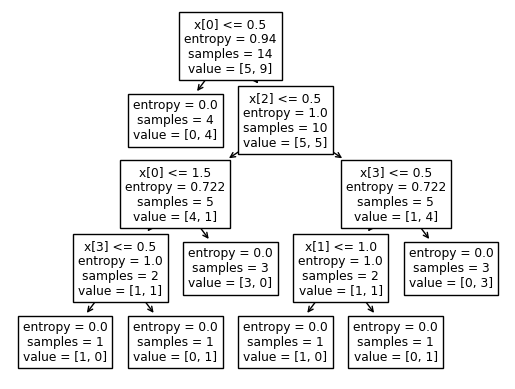

In [15]:
from sklearn import tree
tree.plot_tree(arvore_risco_credito);

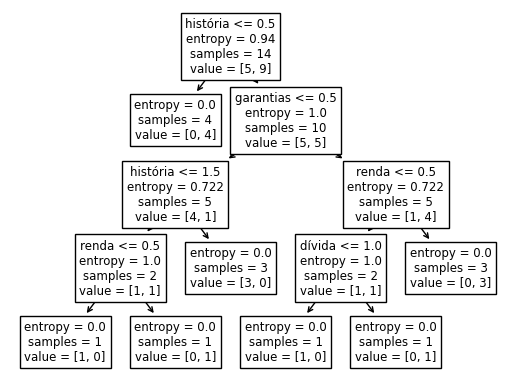

In [16]:
previsores = ['história', 'dívida', 'garantias', 'renda']
tree.plot_tree(arvore_risco_credito, feature_names=previsores);

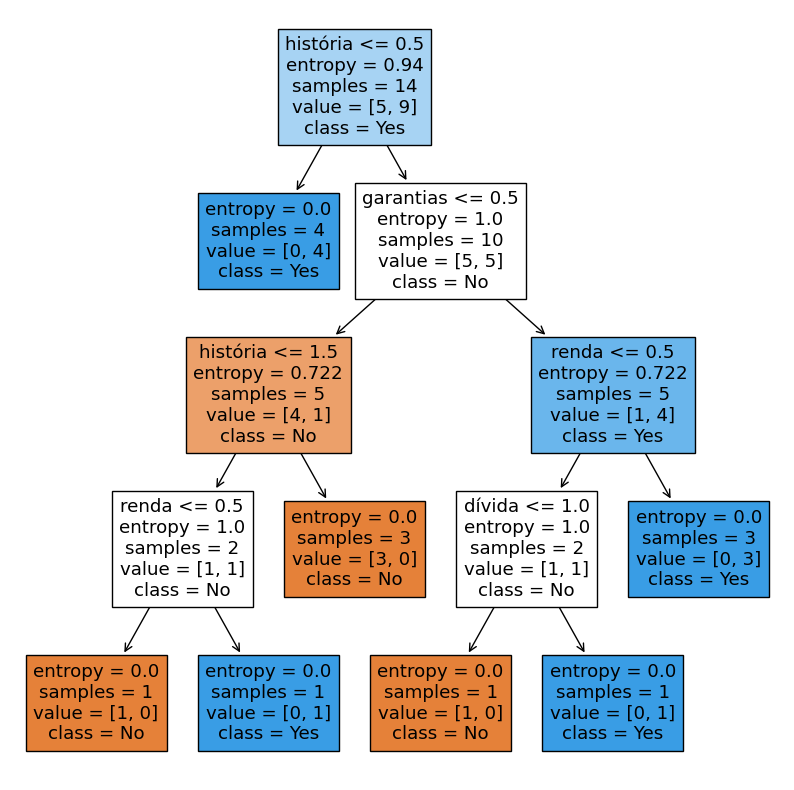

In [17]:
import matplotlib.pyplot as plt
previsores = ['história', 'dívida', 'garantias', 'renda']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(arvore_risco_credito, feature_names=previsores, class_names = arvore_risco_credito.classes_, filled=True);

In [18]:
# Registro 1 - Cliente 1
# história boa, dívida alta, garantias nenhuma, renda > 35
#previsoes = arvore_risco_credito.predict([[0,0,1,2]])
#previsoes

# Registro 2 - Cliente 2
# história ruim, dívida alta, garantias adequada, renda < 15
#previsoes = arvore_risco_credito.predict([[2,0,0,0]])
#previsoes

'''
# Todos Clientes da Base de Dados - Treinamento!
previsoes = arvore_risco_credito.predict([
    [2, 0, 1, 0],
    [1, 0, 1, 1],
    [1, 1, 1, 1],
    [1, 1, 1, 2],
    [1, 1, 1, 2],
    [1, 1, 0, 2],
    [2, 1, 1, 0],
    [2, 1, 0, 2],
    [0, 1, 1, 2],
    [0, 0, 0, 2],
    [0, 0, 1, 0],
    [0, 0, 1, 1],
    [0, 0, 1, 2],
    [2, 0, 1, 1]])
#previsoes
#for n in previsoes:
    print(n)
'''

# Todos Clientes da Base de Dados - Teste!
previsoes = arvore_risco_credito.predict([
    [2, 0, 0, 0],
    [1, 0, 0, 0],
    [1, 1, 1, 2],
    [0, 0, 0, 1]])
#previsoes
for n in previsoes:
    print(n)

No
No
Yes
Yes
